<a href="https://colab.research.google.com/github/Hemanth410792/Credit-card-approval/blob/main/Credit_card_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Approval Prediction**

This project aims to build a model for predicting credit card application approvals based on applicant data. The workflow includes data preprocessing, feature engineering, model building, optimization, and evaluation.

In [ ]:
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Scikit-Learn libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')




#Load and Merge Data
This code loads the application and credit record datasets and merges them on the ID column to form a unified dataset for analysis.



In [ ]:
path= '/content/drive/MyDrive/MY projects/application_record.csv'
path1= '/content/drive/MyDrive/MY projects/credit_record.csv'

In [ ]:
cf =pd.read_csv(path)
cr =pd.read_csv(path1)

In [ ]:
cr.head()

cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
#merge data
cf = pd.merge(cf, cr, on='ID', how='left')

In [ ]:
cf.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0.0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1.0,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2.0,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3.0,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4.0,C


In [ ]:
cf.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
1179810,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,NaN,NaN
1179811,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,NaN,NaN
1179812,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,NaN,NaN
1179813,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0,NaN,NaN
1179814,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2.0,NaN,NaN


In [ ]:
cf.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,1.179815e+06,1.179815e+06,1.179815e+06,1.179815e+06,1.179815e+06,1179815.0,1.179815e+06,1.179815e+06,1.179815e+06,1.179815e+06,777715.000000
mean,5.429449e+06,4.277560e-01,1.882163e+05,-1.608234e+04,5.876616e+04,1.0,2.224645e-01,2.962507e-01,9.788060e-02,2.203816e+00,-19.373564
std,5.748228e+05,7.381708e-01,1.048445e+05,4.131930e+03,1.373000e+05,0.0,4.159017e-01,4.566031e-01,2.971533e-01,9.035046e-01,14.082208
min,5.008804e+06,0.000000e+00,2.610000e+04,-2.520100e+04,-1.753100e+04,1.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-60.000000
25%,5.061203e+06,0.000000e+00,1.215000e+05,-1.947300e+04,-3.242000e+03,1.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,-29.000000
50%,5.115961e+06,0.000000e+00,1.620000e+05,-1.571100e+04,-1.617000e+03,1.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,-17.000000
75%,5.769826e+06,1.000000e+00,2.250000e+05,-1.264600e+04,-4.120000e+02,1.0,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,-8.000000
max,7.999952e+06,1.900000e+01,6.750000e+06,-7.489000e+03,3.652430e+05,1.0,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,0.000000


In [ ]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179815 entries, 0 to 1179814
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID                   1179815 non-null  int64  
 1   CODE_GENDER          1179815 non-null  object 
 2   FLAG_OWN_CAR         1179815 non-null  object 
 3   FLAG_OWN_REALTY      1179815 non-null  object 
 4   CNT_CHILDREN         1179815 non-null  int64  
 5   AMT_INCOME_TOTAL     1179815 non-null  float64
 6   NAME_INCOME_TYPE     1179815 non-null  object 
 7   NAME_EDUCATION_TYPE  1179815 non-null  object 
 8   NAME_FAMILY_STATUS   1179815 non-null  object 
 9   NAME_HOUSING_TYPE    1179815 non-null  object 
 10  DAYS_BIRTH           1179815 non-null  int64  
 11  DAYS_EMPLOYED        1179815 non-null  int64  
 12  FLAG_MOBIL           1179815 non-null  int64  
 13  FLAG_WORK_PHONE      1179815 non-null  int64  
 14  FLAG_PHONE           1179815 non-null  int64  
 15

##Exploratory Data Analysis (EDA)

This section checks for missing values, visualizes correlations between features, and displays the distribution and outliers in numerical features using histograms and box plots.



In [ ]:
#checking for missing values
cf.isnull().sum()


,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


 **Correlation Matrix for Numerical Features**

The correlation matrix below shows the relationships between different numerical features in the dataset. By visualizing these correlations, we can identify pairs of features that are highly correlated, which may inform feature selection or dimensionality reduction in the modeling phase.

- **Positive correlations** are represented by darker shades of red, indicating that as one variable increases, so does the other.
- **Negative correlations** are represented by shades of blue, indicating an inverse relationship between variables.

This analysis helps us understand the interdependencies between variables, allowing us to address multicollinearity where necessary.


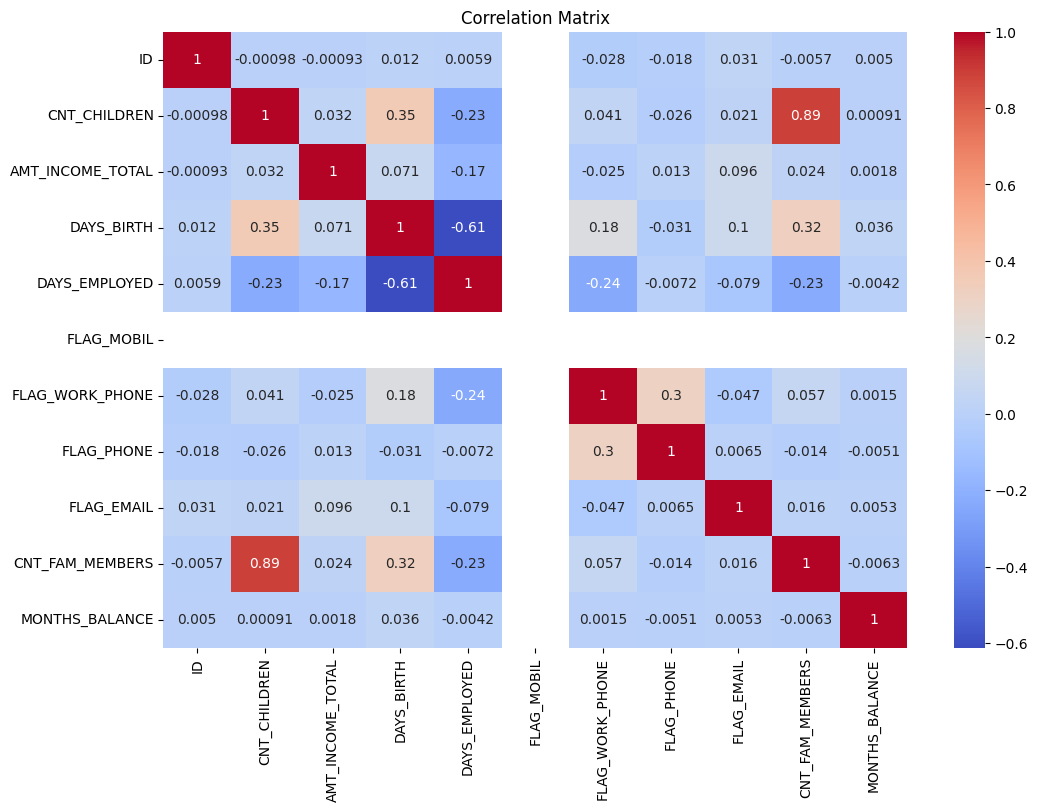

In [ ]:
# Correlation matrix for numerical features, including the encoded TransactionType
plt.figure(figsize=(12, 8))
sns.heatmap(cf.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Distribution of Numerical Features**

The histograms below show the distribution of each numerical feature in the dataset. Examining these distributions allows us to:

- **Identify Skewness**: Features that are highly skewed may need transformation to improve model performance.
- **Detect Outliers**: Outliers can be spotted as values that are far away from the main distribution.
- **Assess Data Range**: Understanding the range of values helps in scaling or normalizing the data.

By visualizing each feature’s distribution, we can decide on further preprocessing steps, such as transformations or handling outliers.


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

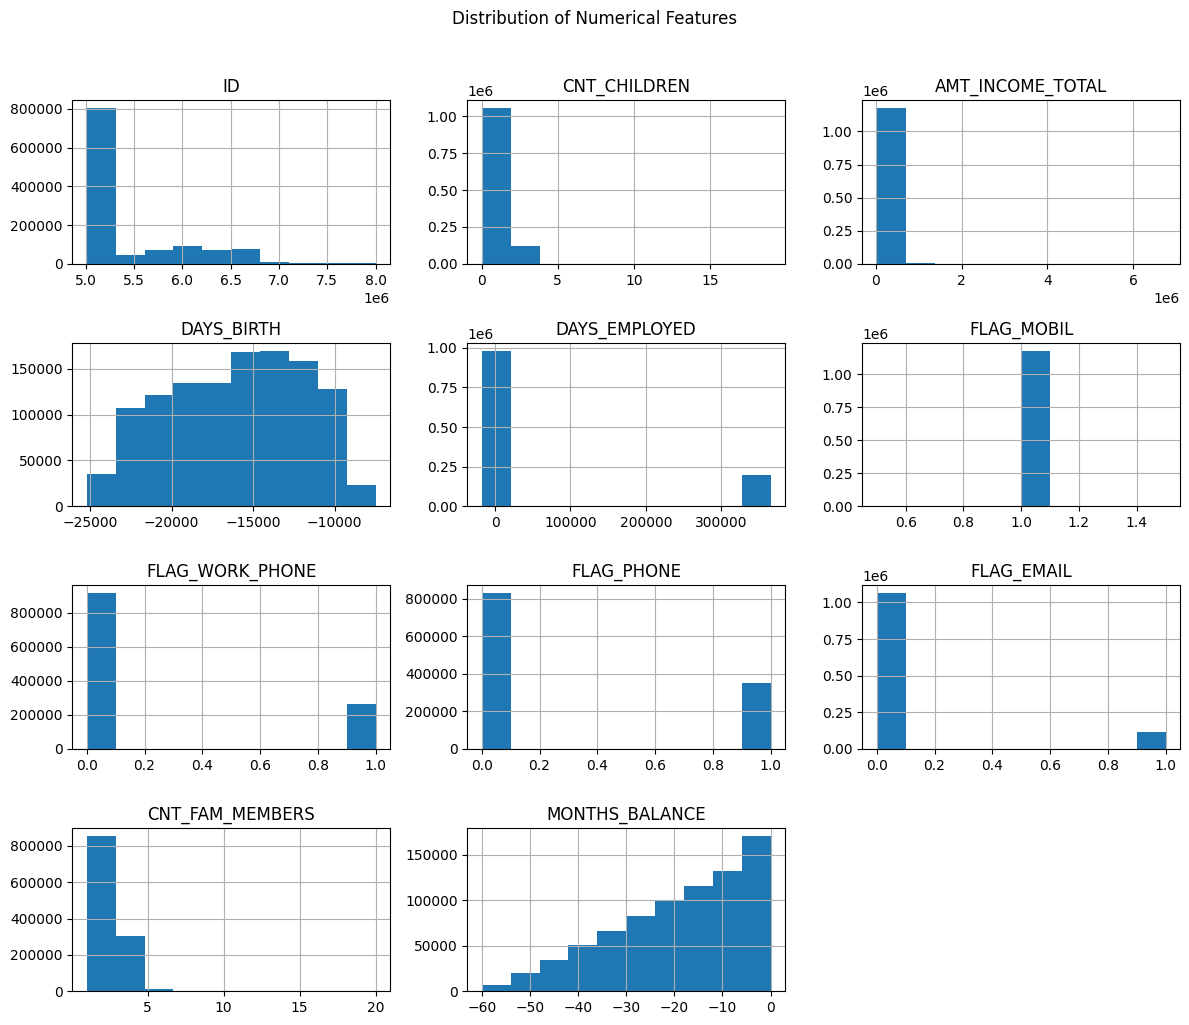

In [ ]:
numerical_columns = cf.select_dtypes(include=np.number).columns
cf[numerical_columns].hist(figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.tight_layout()
plt

**Box Plot of Numerical Features**

The box plot below shows the distribution and presence of outliers for each numerical feature. This visualization is helpful in identifying:

- **Outliers**: Points outside the whiskers indicate outliers, which may need to be handled during data preprocessing.
- **Spread of Data**: The length of the box shows the interquartile range (IQR), indicating the spread of the middle 50% of values.
- **Feature Scaling**: Features with widely differing scales may need normalization or standardization.

By analyzing the box plot, we can identify features with significant outliers and variations in scale, helping guide our data preprocessing strategy.


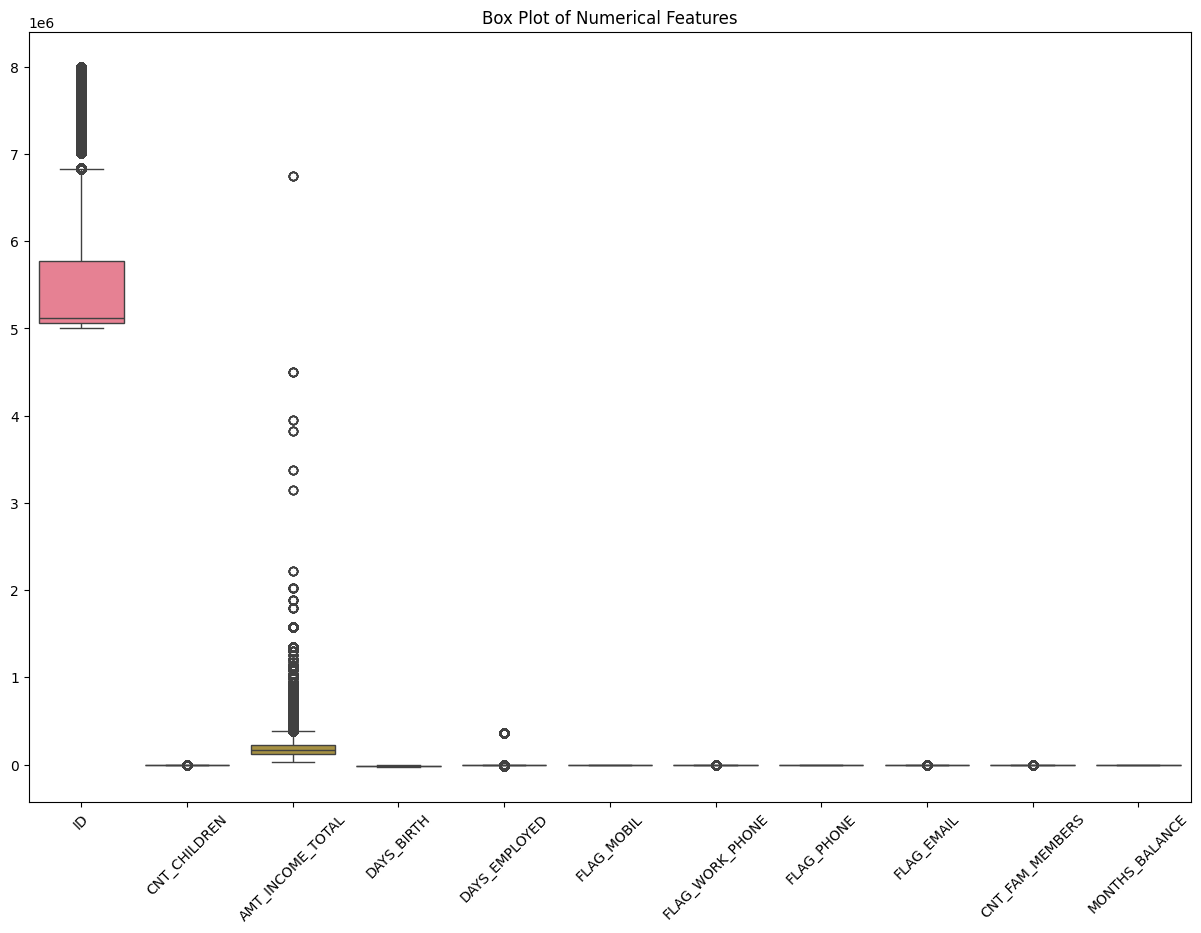

In [ ]:
#box plot
plt.figure(figsize=(15, 10))
sns.boxplot(data=cf[numerical_columns])
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

#Income analysis and outliers

This code calculated the income quartiles and identifies potential outliers in the AMT_INCOME_TOTAL column. Abox plot is used to display income distribution without outliers.

In [ ]:
#Calculating the quartiles
cf_q1 = cf['AMT_INCOME_TOTAL'].quantile(0.25)
cf_q3 =cf['AMT_INCOME_TOTAL'].quantile(0.75)
cf_iqr =cf_q3 - cf_q1
cf_lower_bound = cf_q1 - 1.5 * cf_iqr
cf_upper_bound = cf_q3 + 1.5 * cf_iqr
print(cf_q1)
print(cf_q3)
print(cf_iqr)

121500.0
225000.0
103500.0


In [ ]:
print(cf_lower_bound)
print(cf_upper_bound)

-33750.0
380250.0


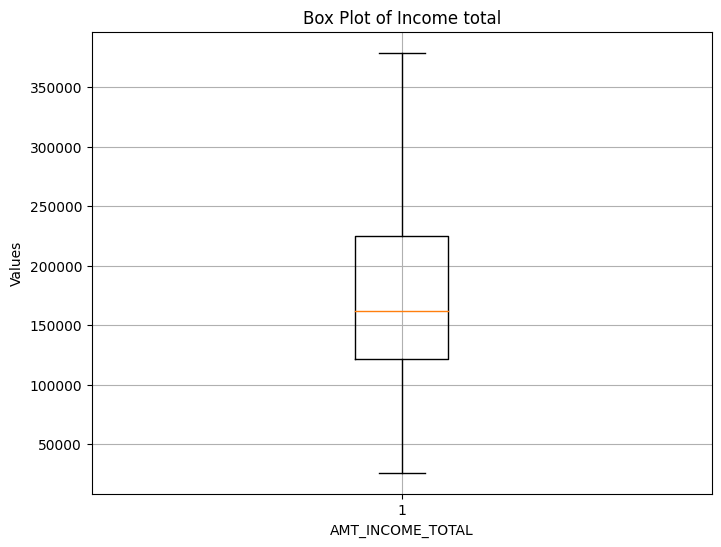

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(cf['AMT_INCOME_TOTAL'], showfliers=False)  # Set showfliers=False to exclude outliers
plt.title('Box Plot of Income total')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Values')
plt.grid(True)

In [ ]:
# Adjust income categorization thresholds
def Income_categories(AMT_INCOME_TOTAL):
    if AMT_INCOME_TOTAL <= 25000:
        return "low income"
    elif AMT_INCOME_TOTAL <= 75000:
        return "medium income"
    else:
        return "high income"

In [ ]:

cf['income_category'] = cf['AMT_INCOME_TOTAL'].apply(Income_categories)


In [ ]:
# Convert DAYS_BIRTH to birth date and then extract the birth year
cf['Birth_Date'] = cf['DAYS_BIRTH'].apply(lambda x: datetime.now() + timedelta(days=x))
cf['Birth_Year'] = cf['Birth_Date'].dt.year



In [ ]:
# Cap 'DAYS_EMPLOYED' to a reasonable limit before calculating 'Employment_Date'
max_days = 365 * 100  # Example: Cap at 100 years
cf['DAYS_EMPLOYED'] = cf['DAYS_EMPLOYED'].clip(upper=max_days)


In [ ]:
cf['Employment_Date'] = cf['DAYS_EMPLOYED'].apply(lambda x: datetime.now() + timedelta(days=int(x)) if pd.notna(x) and isinstance(x, (int, float)) else pd.NaT)
cf['Employment_Year'] = pd.to_datetime(cf['Employment_Date']).dt.year

In [ ]:
cf.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,income_category,Birth_Date,Birth_Year,Employment_Date,Employment_Year
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,NaN,2.0,0.0,C,high income,1991-12-16 10:50:37.704680,1991,2012-05-22 10:50:57.813705,2012
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,NaN,2.0,-1.0,C,high income,1991-12-16 10:50:37.704706,1991,2012-05-22 10:50:57.813733,2012
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,NaN,2.0,-2.0,C,high income,1991-12-16 10:50:37.704710,1991,2012-05-22 10:50:57.813737,2012
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,NaN,2.0,-3.0,C,high income,1991-12-16 10:50:37.704715,1991,2012-05-22 10:50:57.813739,2012
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,NaN,2.0,-4.0,C,high income,1991-12-16 10:50:37.704719,1991,2012-05-22 10:50:57.813742,2012


In [ ]:
cf = cf.drop([ 'Birth_Date','Employment_Date'], axis=1)  # Drop specified columns

In [ ]:
cf.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,income_category,Birth_Year,Employment_Year
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,0.0,C,high income,1991,2012
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,-1.0,C,high income,1991,2012
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,-2.0,C,high income,1991,2012
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,-3.0,C,high income,1991,2012
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,-4.0,C,high income,1991,2012


In [ ]:
#count of different statuses for each ID
status_counts = cf.groupby('ID')['STATUS'].value_counts()
status_counts

ID       STATUS
5008804  C         13
         0          1
         1          1
         X          1
5008805  C         12
                   ..
5150483  X         18
5150484  0         12
         C          1
5150485  0          2
5150487  C         30
Name: count, Length: 74874, dtype: int64

In [ ]:
# Creating a simple credit score based on late payments (using previously aggregated features)
cf['late_payments'] = cf['STATUS'].apply(lambda x: 1 if (isinstance(x, (int, float)) and x >= 2) or (isinstance(x, str) and x >= '2') else 0)
# This line checks the type of x and uses the appropriate comparison
# If x is a number (int or float), it compares with 2
# If x is a string, it compares with '2'
# Aggregating late payments by ID (we assume cf has been merged with credit_record)
late_payments_summary = cf.groupby('ID')['late_payments'].sum()
cf = cf.merge(late_payments_summary, on='ID', suffixes=('', '_total'))

# Defining approval criteria based on late payments (you may adjust threshold based on domain knowledge)
cf['approval_status'] = cf['late_payments_total'].apply(lambda x: 'Rejected' if x > 3 else 'Approved')

In [ ]:
#Encode the Target Variable
cf['approval_status'] = cf['approval_status'].map({'Approved': 1, 'Rejected': 0})


In [ ]:
# Selecting features (assuming 'income_category', 'Birth_Year', 'Employment_Year', etc. are already created)
features = cf[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'late_payments_total', 'approval_status']]
X = features.drop('approval_status', axis=1)
y = features['approval_status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Calculate late payments and aggregate by ID
cf['late_payments'] = cf['STATUS'].apply(lambda x: 1 if (isinstance(x, (int, float)) and x >= 2) or (isinstance(x, str) and x >= '2') else 0)
# This line checks the type of x and uses the appropriate comparison
# If x is a number (int or float), it compares with 2
# If x is a string, it compares with '2'
late_payments_summary = cf.groupby('ID')['late_payments'].sum()

# Instead of dropping, merge the late_payments_summary back into cf
cf = cf.merge(late_payments_summary.rename('late_payments_total'), left_on='ID', right_index=True, how='left')

# Remove the temporary 'late_payments' column if not needed
cf = cf.drop(columns=['late_payments'], errors='ignore')

# Now you can access 'late_payments_total' in your feature selection:
X = cf[['AMT_INCOME_TOTAL', 'age', 'employment_duration', 'CNT_FAM_MEMBERS', 'late_payments_total']]
y = cf['approval_status']

### Decision Tree Classifier Model

In this section, we implement a **Decision Tree Classifier** to predict credit card approvals. Decision Trees are intuitive models that split the data based on feature values to make predictions. We control the complexity of the tree using parameters like `max_depth` and `min_samples_split` to prevent overfitting.

- **Parameters**:
  - `max_depth=5`: Limits the depth of the tree to 5 levels to reduce complexity.
  - `min_samples_split=10`: Ensures that each split has at least 10 samples, avoiding overly specific rules.

#### Model Evaluation

After training, we evaluate the model using:
- **Accuracy**: Measures the percentage of correct predictions.
- **Classification Report**: Provides precision, recall, and F1-score for each class, giving a comprehensive view of the model's performance.

#### Results Interpretation

The model achieved 100% accuracy, which might indicate **overfitting**, as this is unusual on real-world data. Overfitting occurs when the model learns the noise in the training data instead of the underlying pattern, making it less generalizable to new data. To address this, we might consider adjusting parameters, pruning the tree, or using a more robust algorithm like a Random Forest.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)


# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)



print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)


Model Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    126396
           1       1.00      1.00      1.00    109567

    accuracy                           1.00    235963
   macro avg       1.00      1.00      1.00    235963
weighted avg       1.00      1.00      1.00    235963



### Cross-Validation for Model Evaluation

To assess the stability and generalizability of the **Decision Tree Classifier**, we use **cross-validation**. Cross-validation helps mitigate issues with overfitting by training and testing the model on different subsets of the data. In this case, we employ 5-fold cross-validation.

#### Explanation of Cross-Validation

- **5-Fold Cross-Validation**: The dataset is split into 5 folds. The model is trained on 4 folds and tested on the remaining fold, and this process repeats for all combinations.
- **Accuracy Scores**: After each fold, the accuracy score is calculated. We then compute the average accuracy across all folds to get a more reliable estimate of model performance.

#### Results

The average cross-validation accuracy provides a robust evaluation metric, indicating how well the model might perform on unseen data. If the average accuracy varies significantly from the single test set accuracy, it may suggest issues like overfitting or data leakage.


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Adjusted Decision Tree with cross-validation
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%")


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Average Cross-Validation Accuracy: 100.00%


In [ ]:
# Dropping potentially leaking feature
features = cf[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'approval_status']]
X = features.drop('approval_status', axis=1)
y = features['approval_status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Engineering: Age and Employment Duration

To improve model interpretability and performance, we engineered two new features:

- **Age**: Converted `DAYS_BIRTH` (days since birth) to age in years. This makes the feature more understandable and potentially more predictive.
- **Employment Duration**: Converted `DAYS_EMPLOYED` (days of employment) to employment duration in years, which provides clearer insights into an applicant’s work history.

After creating these features, we dropped the original columns (`DAYS_BIRTH` and `DAYS_EMPLOYED`) as they were no longer needed. This simplifies the dataset and helps focus the model on meaningful, interpretable features.

#### Feature and Target Variable Definition

- **Features**: Includes `AMT_INCOME_TOTAL`, `age`, `employment_duration`, and `CNT_FAM_MEMBERS`.
- **Target Variable**: `approval_status`, representing the model’s goal to predict credit approval.

This feature engineering step enhances the dataset’s quality, leading to better model interpretability and potentially improved accuracy.


In [ ]:
# Feature engineering: Add Age and Employment Duration
cf['age'] = -cf['DAYS_BIRTH'] / 365
cf['employment_duration'] = -cf['DAYS_EMPLOYED'] / 365

# Drop the original days columns as they are no longer needed
cf = cf.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1)

# Redefine features and split
features = cf[['AMT_INCOME_TOTAL', 'age', 'employment_duration', 'CNT_FAM_MEMBERS', 'approval_status']]
X = features.drop('approval_status', axis=1)
y = features['approval_status']



### Logistic Regression Model

In this section, we use **Logistic Regression** to predict credit card approvals. Logistic Regression is a baseline linear model that is effective for binary classification tasks like this one. It is relatively simple but can provide insights into the separability of the data.

#### Model Parameters

- **Random State**: Set to 42 for reproducibility.
- **Max Iterations**: Increased to 1000 to ensure convergence, as some datasets require more iterations.

#### Model Evaluation

We evaluate the model using:
- **Accuracy**: The percentage of correct predictions.
- **Classification Report**: Shows precision, recall, and F1-score for each class (approved or rejected).

#### Results

The model achieved an accuracy of 53.57%, with precision and recall varying significantly between the two classes:
- Class 0 (Rejected) has high precision and recall, indicating that the model is strongly biased towards predicting rejections.
- Class 1 (Approved) has very low recall, suggesting the model struggles to identify approvals accurately.

These results indicate that Logistic Regression may not be complex enough to capture the underlying patterns in the data, and a more sophisticated model may be needed.


In [ ]:
# Train with Logistic Regression or other models as before
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)

Model Accuracy: 53.57%
Classification Report:
               precision    recall  f1-score   support

           0       0.54      1.00      0.70    126396
           1       0.53      0.00      0.00    109567

    accuracy                           0.54    235963
   macro avg       0.53      0.50      0.35    235963
weighted avg       0.53      0.54      0.38    235963



### Random Forest Classifier

To improve model performance, we used a **Random Forest Classifier**, which is an ensemble method that combines multiple decision trees to achieve a more accurate and stable prediction. Random Forests are robust, handle feature interactions well, and are less prone to overfitting than individual decision trees.

#### Model Parameters

- **n_estimators=400**: The number of trees in the forest. Increasing this value generally improves accuracy but increases computational cost.
- **max_depth=30**: Limits the depth of each tree to prevent overfitting.
- **random_state=42**: Ensures reproducibility by setting a seed for random processes.

#### Model Evaluation

We evaluate the model using:
- **Accuracy**: Overall accuracy of predictions.
- **Classification Report**: Provides precision, recall, and F1-score for each class, helping to assess the model’s performance in predicting approvals and rejections.

#### Results

The Random Forest achieved an accuracy of 91.21%, with high precision and recall across both classes:
- **Class 0 (Rejected)**: The model has high precision (0.88) and recall (0.97), indicating it accurately identifies rejections.
- **Class 1 (Approved)**: The model also performs well for approvals, with precision (0.95) and recall (0.85).

These results indicate that the Random Forest model is effective in distinguishing between approvals and rejections, making it a strong candidate for deployment.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=400, max_depth=30)
rf_model.fit(X_train, y_train)



# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print("Random Forest Classification Report:\n", report_rf)


Random Forest Accuracy: 91.21%
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92    126396
           1       0.95      0.85      0.90    109567

    accuracy                           0.91    235963
   macro avg       0.92      0.91      0.91    235963
weighted avg       0.92      0.91      0.91    235963



### Confusion Matrix for Random Forest Classifier

The confusion matrix below provides insights into the model's performance by showing the counts of **true positives**, **true negatives**, **false positives**, and **false negatives**. This breakdown is essential for evaluating classification models, as it allows us to understand where the model may be making mistakes.

- **True Positives (Bottom-Right Quadrant)**: Correctly classified approvals.
- **True Negatives (Top-Left Quadrant)**: Correctly classified rejections.
- **False Positives (Top-Right Quadrant)**: Instances where rejections were incorrectly classified as approvals.
- **False Negatives (Bottom-Left Quadrant)**: Instances where approvals were incorrectly classified as rejections.

#### Interpretation

In this confusion matrix:
- **Class 0** represents rejections, and **Class 1** represents approvals.
- The model performs well, but some approvals are misclassified as rejections (false negatives), which may indicate areas for further model improvement.

Visualizing the confusion matrix helps in identifying the specific types of errors the model is making, allowing us to tune the model accordingly.


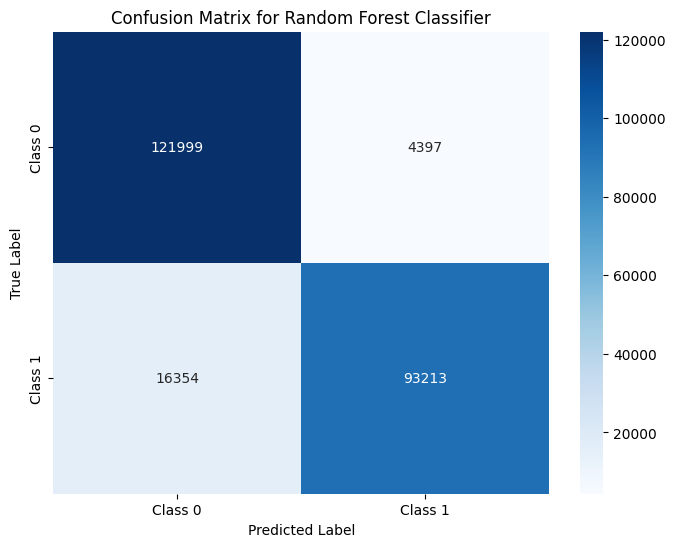

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### ROC Curve for Random Forest Classifier

The **Receiver Operating Characteristic (ROC) Curve** is a graphical representation of a model's performance across various threshold values. It displays the trade-off between the **True Positive Rate (Sensitivity)** and **False Positive Rate**. A **perfect classifier** would have a point at (0,1), meaning 100% True Positive Rate and 0% False Positive Rate.

#### AUC (Area Under Curve)

The **AUC (Area Under Curve)** score, which ranges between 0 and 1, summarizes the model's overall ability to distinguish between the positive and negative classes:
- **AUC = 0.5**: Model performs no better than random chance.
- **AUC = 1.0**: Perfect model.

In this case, the Random Forest model achieved an AUC score of **0.96**, indicating excellent discriminatory ability between the classes.

#### Interpretation

- **True Positive Rate** (Y-axis): The proportion of actual positives correctly identified by the model.
- **False Positive Rate** (X-axis): The proportion of actual negatives incorrectly identified as positives by the model.
- The closer the ROC curve is to the top-left corner, the better the model's performance.

The **diagonal line** represents the performance of a random classifier (AUC = 0.5). Our model's ROC curve is significantly above this line, confirming that the Random Forest classifier is effective in distinguishing between the classes.


In [ ]:
# Add import for roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate AUC score
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"Random Forest AUC Score: {auc_score:.2f}")

# Plot ROC curve (rest of the code remains the same)

Random Forest AUC Score: 0.96


Random Forest AUC Score: 0.96


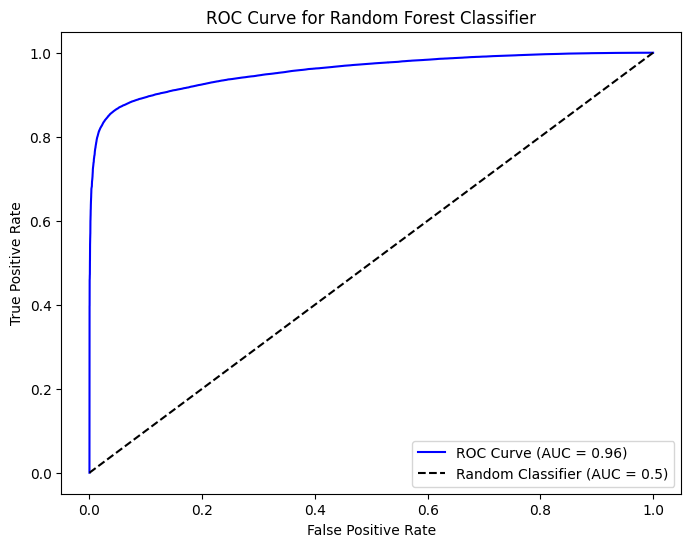

In [ ]:
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"Random Forest AUC Score: {auc_score:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

### Feature Importance in Random Forest Model

Feature importance provides insight into which features are the most influential in the Random Forest model's decision-making process. The higher the importance score, the more significant the feature in predicting the target variable.

#### Key Features

- **DAYS_BIRTH**: This feature has the highest importance, indicating that the model relies heavily on the applicant’s age for classification.
- **DAYS_EMPLOYED**: The length of employment also plays a significant role in predictions, suggesting that job stability might be a key indicator.
- **AMT_INCOME_TOTAL**: The applicant's total income contributes to the model, though to a lesser extent than age and employment duration.
- **CNT_FAM_MEMBERS**: The number of family members has the lowest importance among the top features, but it still contributes to the model.

#### Interpretation

Understanding feature importance helps in:
1. **Model Interpretation**: It allows us to explain why the model makes specific predictions.
2. **Feature Engineering**: We can focus on the most critical features to improve the model further or to simplify it by removing low-importance features.
3. **Business Insights**: This analysis shows which applicant attributes (e.g., age, employment duration) are most relevant to the model’s predictions, providing valuable insights for decision-makers.

The plot visualizes each feature's importance, highlighting the significant predictors that contribute to the Random Forest model’s performance.


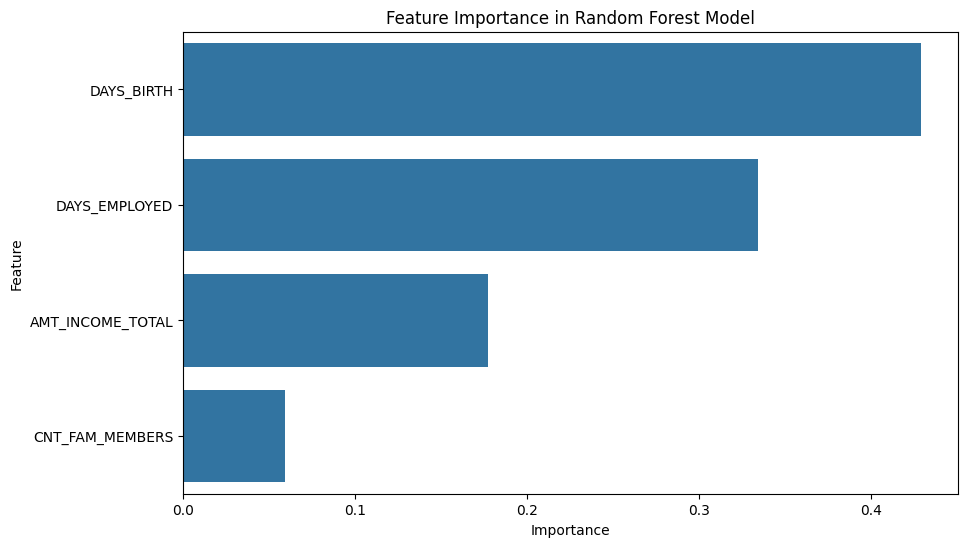

In [ ]:
# Retrieve feature importances from the Random Forest model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Visualization of a Single Decision Tree in the Random Forest

The plot above displays a single decision tree from our Random Forest model. This visualization provides insight into the structure of individual trees within the ensemble. Each node in the tree represents a decision point based on one of the features. Here’s a breakdown of the elements:

#### Key Elements in the Tree Visualization:

- **Nodes**: Each node contains:
  - **Feature and threshold**: The feature and threshold value used for the split.
  - **Gini index**: Measures the impurity of the node; lower values indicate purer nodes.
  - **Sample count**: Shows the number of samples in each node.
  - **Value**: Displays the distribution of classes (Rejected vs. Approved) within the node.
  - **Class**: Indicates the predicted class for the samples in that node.

- **Pathways**:
  - **Left branches** represent samples that meet the condition (e.g., `<= threshold`).
  - **Right branches** represent samples that do not meet the condition (`> threshold`).

#### Key Observations:

- **Root Node**: The tree starts with a split on one of the key features, e.g., `AMT_INCOME_TOTAL`, showing the primary decision point.
- **Depth and Complexity**: We limited the visualization to a depth of 3 to focus on the top decisions in the tree. Deeper levels add complexity and provide further fine-tuning but may lead to overfitting if examined alone.
- **Class Distribution**: The model uses features like `DAYS_EMPLOYED`, `DAYS_BIRTH`, and `AMT_INCOME_TOTAL` to separate classes, aiming to reduce impurity in each node.

#### Importance of Visualizing Individual Trees

While Random Forests combine the results of many trees, examining an individual tree helps in understanding:
1. **Decision Rules**: Identify the logic and thresholds that guide decisions within the model.
2. **Feature Influence**: See which features are chosen as split points and how they affect the classification.
3. **Interpretability**: Helps explain to stakeholders how specific features, like `age` or `income`, contribute to approval or rejection.

This visualization provides a clearer understanding of how certain factors influence decisions within one part of the Random Forest.


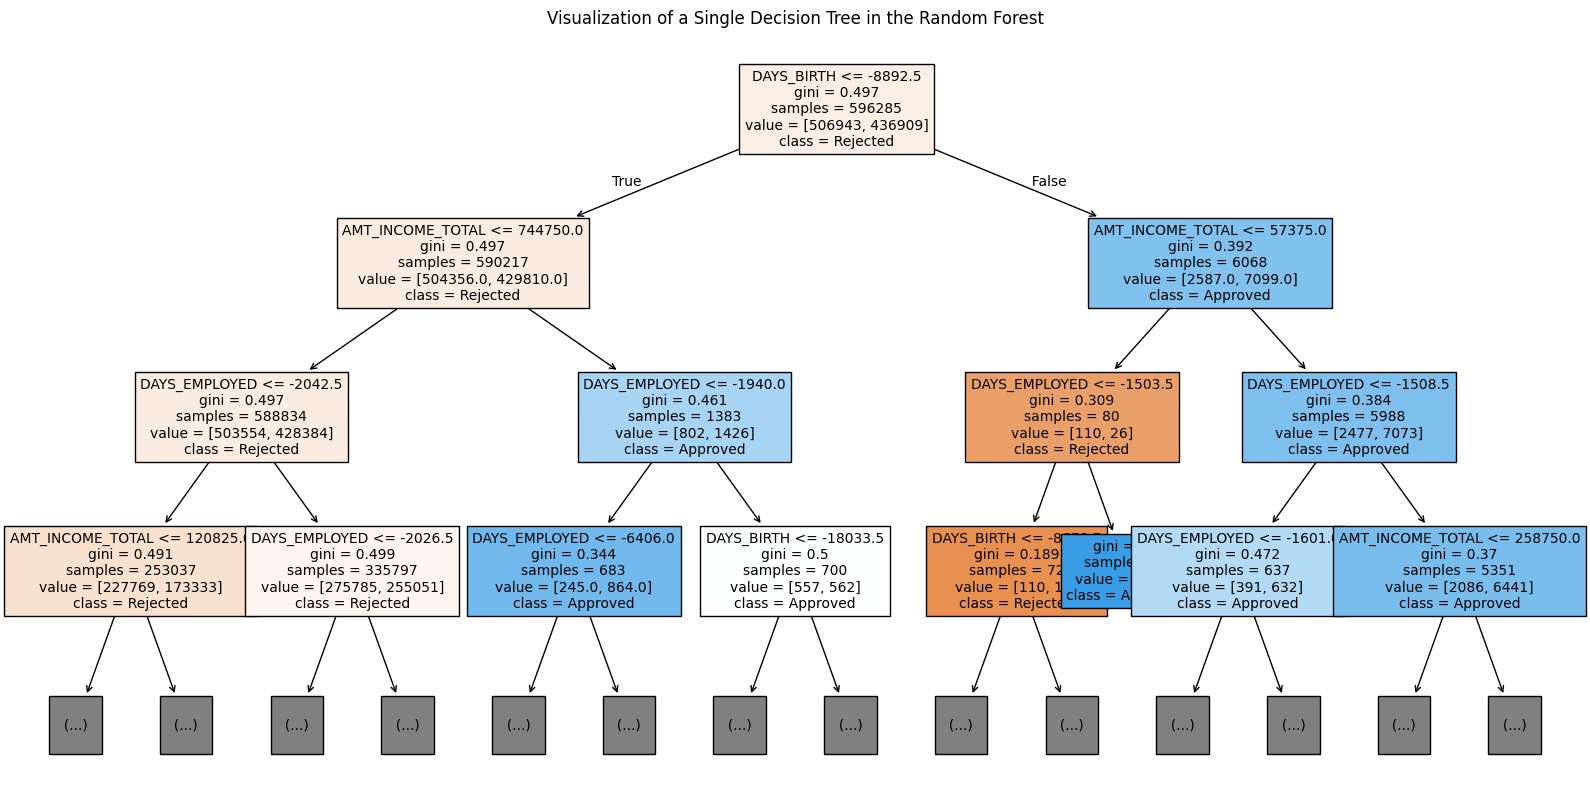

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract a single tree from the Random Forest model
single_tree = rf_model.estimators_[0]

# Set up the plot
plt.figure(figsize=(20, 10), dpi=100)  # Increase DPI for better resolution

# Plot the tree with improved readability
plot_tree(
    single_tree,
    filled=True,
    feature_names=X_train.columns,
    class_names=['Rejected', 'Approved'],
    max_depth=3,  # Adjust this to display more or less of the tree
    fontsize=10  # Adjust font size for readability
)

plt.title("Visualization of a Single Decision Tree in the Random Forest")
plt.show()

